In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read csv files
customer_data = pd.read_csv('musteri_verisi_5000_utf8.csv')
sales_data = pd.read_csv('satis_verisi_5000.csv')

TASK 1 - DATA CLEANING AND MANIPULATION

In [3]:
#Analyze missing data for both table

print("Missing values in Customer Data:\n", customer_data.isnull().sum())
print("Missing values in Sales Data:\n", sales_data.isnull().sum())

Missing values in Customer Data:
 musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
dtype: int64
Missing values in Sales Data:
 tarih           0
ürün_kodu       0
ürün_adi        0
kategori        0
fiyat           0
adet            0
toplam_satis    0
musteri_id      0
dtype: int64


In [4]:
"""
According to the above results, there is no missing data in both tables. Therefore, no data filling process can be done.
"""

'\nAccording to the above results, there is no missing data in both tables. Therefore, no data filling process can be done.\n'

In [5]:
#Outlier detection using IQR Based Filtering
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR    

    #Find rows with outliers
    outliers = df[(df[column] <= lower_bound) | (df[column] >= upper_bound)]
    print(f"Outliers detected in '{column}': {len(outliers)}")
    print(f"Lower bound= {lower_bound}")
    print(f"Upper bound= {upper_bound}")
    return outliers, lower_bound, upper_bound

Outliers detected in 'fiyat': 0
Lower bound= -763.4600000000003
Upper bound= 2242.1800000000003


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


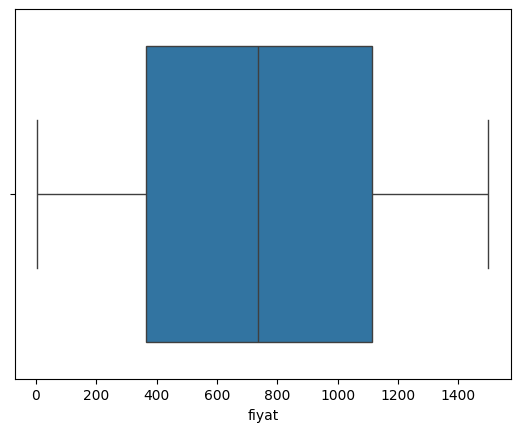

In [6]:
price_outliers, price_lower, price_upper = detect_outliers(sales_data, 'fiyat')

sns.boxplot(data=sales_data, x='fiyat')
plt.show()

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Outliers detected in 'adet': 0
Lower bound= -10.0
Upper bound= 30.0


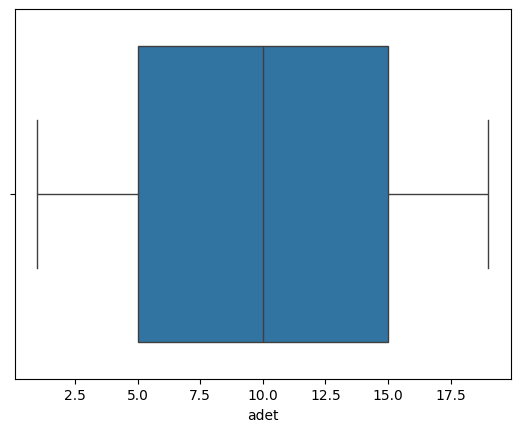

In [7]:
piece_outliers, piece_lower, piece_upper = detect_outliers(sales_data, 'adet')

sns.boxplot(data=sales_data, x='adet')
plt.show()

Outliers detected in 'toplam_satis': 35
Lower bound= -12038.167499999998
Upper bound= 25688.4525


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


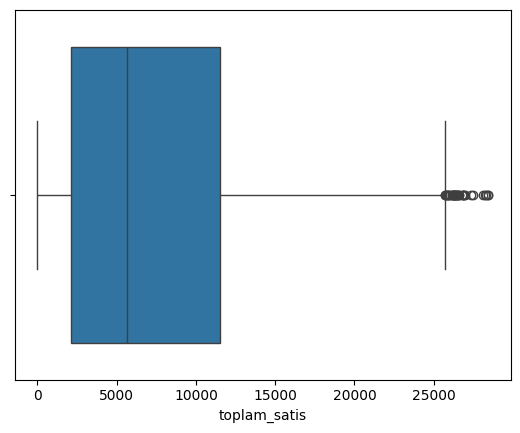

In [8]:
total_sales_outliers, total_sales_lower, total_sales_upper = detect_outliers(sales_data, 'toplam_satis')

sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()

#There are 35 outliers for total sales

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Outliers detected in 'harcama_miktari': 0
Lower bound= -2407.415
Upper bound= 7514.085


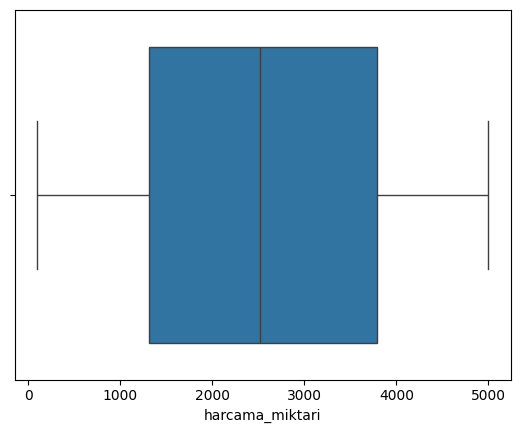

In [9]:
spending_amount_outliers, spending_amount_lower, spending_amount_upper = detect_outliers(customer_data, 'harcama_miktari')

sns.boxplot(data=customer_data, x='harcama_miktari')
plt.show()

Outliers detected in 'yas': 0
Lower bound= -8.0
Upper bound= 96.0


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


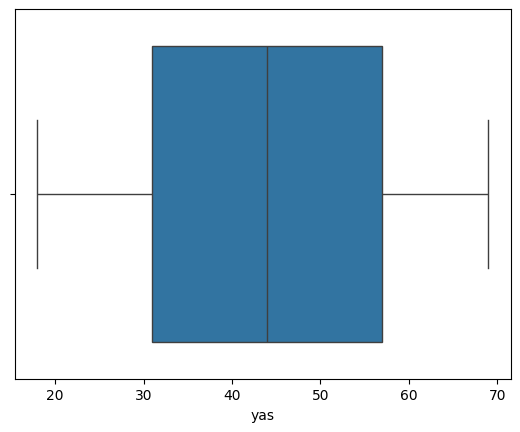

In [10]:
age_outliers, age_lower, age_upper = detect_outliers(customer_data, 'yas')

sns.boxplot(data=customer_data, x='yas')
plt.show()

In [11]:
def winsorize_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].apply(
        lambda x: min(max(x, lower_bound), upper_bound)
    )
    return df

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


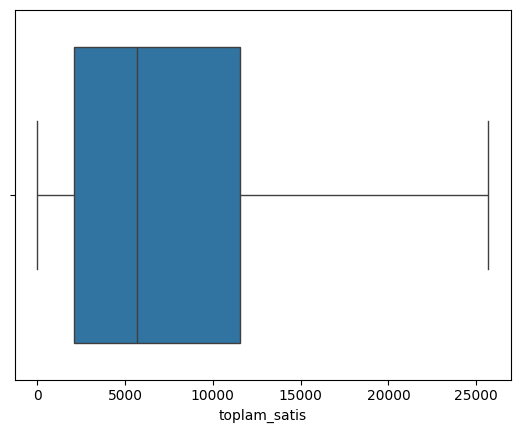

In [12]:
sales_data = winsorize_outliers(sales_data,'toplam_satis', total_sales_lower, total_sales_upper)

sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()


In [13]:
#Merge datasets
merged_data = pd.merge(sales_data, customer_data, on="musteri_id", how="inner")


In [14]:
merged_data.head()

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,2023-07-02,P032,Mouse,Ev Aletleri,1207.30,13,15694.90,9225,Masume,Kadın,35,İstanbul,3588.15
1,2024-02-11,P051,Kalem,Kırtasiye,237.14,16,3794.24,3955,Fenni,Kadın,64,Konya,3742.46
2,2023-03-06,P024,Bilgisayar,Ev Aletleri,1024.29,9,9218.61,2367,Feyruz,Kadın,45,Bursa,197.55
3,2024-04-11,P040,Klima,Kırtasiye,1477.88,9,13300.92,2869,Ülke,Kadın,43,İstanbul,3662.18
4,2024-01-08,P050,Klima,Giyim,949.43,19,18039.17,9724,Tonguç,Erkek,41,Bursa,2536.20


In [15]:
#Save merged dataset
merged_data.to_csv("merged_data.csv", index=False)

TASK 2: TIME SERIES ANALYSIS
Since there were no customer details in the analyses in this task, the sales_dataset was used instead of merged_data.

In [16]:
#Convert date column to datatime format
sales_data["tarih"] = pd.to_datetime(sales_data["tarih"])

#Since time-based operations cannot be performed when the dates are not correct,
#conversion was made to the appropriate format.


#resample function is used for time series data


In [17]:
#Start and end date value of sales data
start_date = sales_data["tarih"].min()
end_date = sales_data["tarih"].max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2022-11-06 00:00:00
End date: 2024-11-05 00:00:00


In [18]:
#Find the dates of the first and last sales days of each month
monthly_first_last_days = sales_data.groupby(sales_data["tarih"].dt.to_period("M")).agg(
    first_day=("tarih", "min"),
    last_day=("tarih",  "max")
)

#Find the names of the first and last sales days of each month
monthly_first_last_days["first_day_name"] = monthly_first_last_days["first_day"].dt.day_name()
monthly_first_last_days["last_day_name"] = monthly_first_last_days["last_day"].dt.day_name()

print(f"First and Last Sales Days of each Month \n{monthly_first_last_days}")

First and Last Sales Days of each Month 
         first_day   last_day first_day_name last_day_name
tarih                                                     
2022-11 2022-11-06 2022-11-30         Sunday     Wednesday
2022-12 2022-12-01 2022-12-31       Thursday      Saturday
2023-01 2023-01-01 2023-01-31         Sunday       Tuesday
2023-02 2023-02-01 2023-02-28      Wednesday       Tuesday
2023-03 2023-03-01 2023-03-31      Wednesday        Friday
2023-04 2023-04-01 2023-04-30       Saturday        Sunday
2023-05 2023-05-01 2023-05-31         Monday     Wednesday
2023-06 2023-06-01 2023-06-30       Thursday        Friday
2023-07 2023-07-01 2023-07-31       Saturday        Monday
2023-08 2023-08-01 2023-08-31        Tuesday      Thursday
2023-09 2023-09-01 2023-09-30         Friday      Saturday
2023-10 2023-10-01 2023-10-31         Sunday       Tuesday
2023-11 2023-11-01 2023-11-30      Wednesday      Thursday
2023-12 2023-12-01 2023-12-31         Friday        Sunday
2024-01 2024-01

In [19]:
#Weekly product sales quantity analysis for date
weekly_product_sales_quantity = sales_data.resample("W", on="tarih")["adet"].sum() 
print(f"Weekly Product Sales Quantity \n{weekly_product_sales_quantity}")

Weekly Product Sales Quantity 
tarih
2022-11-06     57
2022-11-13    428
2022-11-20    455
2022-11-27    459
2022-12-04    518
             ... 
2024-10-13    522
2024-10-20    454
2024-10-27    641
2024-11-03    472
2024-11-10     72
Freq: W-SUN, Name: adet, Length: 106, dtype: int64


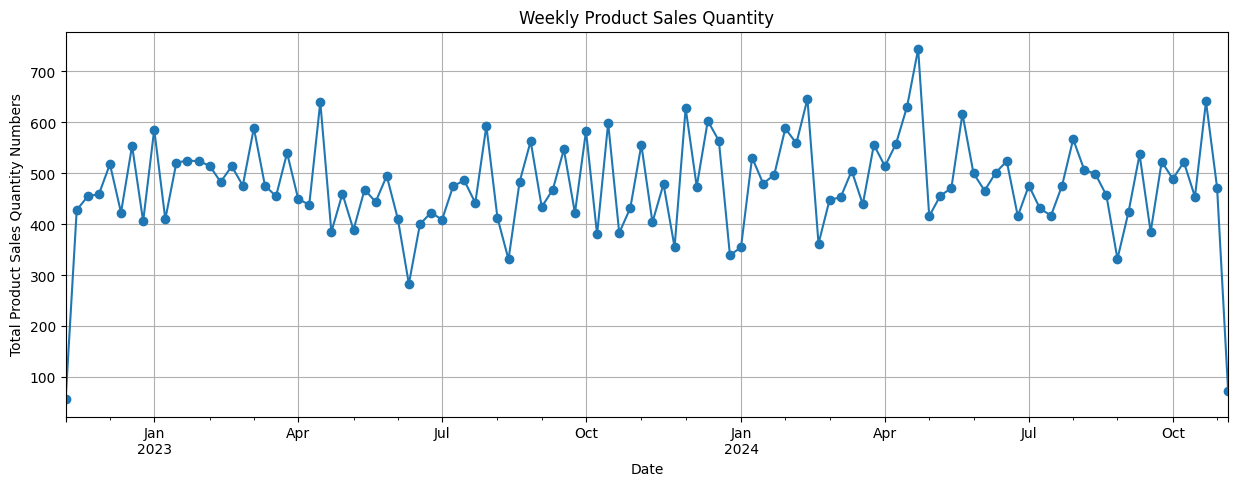

In [20]:
weekly_product_sales_quantity.plot(kind="line",title="Weekly Product Sales Quantity", figsize=(15, 5), marker="o")
plt.ylabel("Total Product Sales Quantity Numbers")
plt.xlabel("Date")
plt.grid()
plt.show()

In [21]:
#Weekly total sales analysis for date
weekly_total_sales = sales_data.resample("W", on="tarih")["toplam_satis"].sum()     #resample function is used for time series data
print(f"Weekly Total Sales \n {weekly_total_sales}")

Weekly Total Sales 
 tarih
2022-11-06     22763.9700
2022-11-13    283830.0700
2022-11-20    335582.2100
2022-11-27    330015.6800
2022-12-04    377958.5500
                 ...     
2024-10-13    312159.8400
2024-10-20    331775.4425
2024-10-27    403756.8725
2024-11-03    335001.9700
2024-11-10     70866.8100
Freq: W-SUN, Name: toplam_satis, Length: 106, dtype: float64


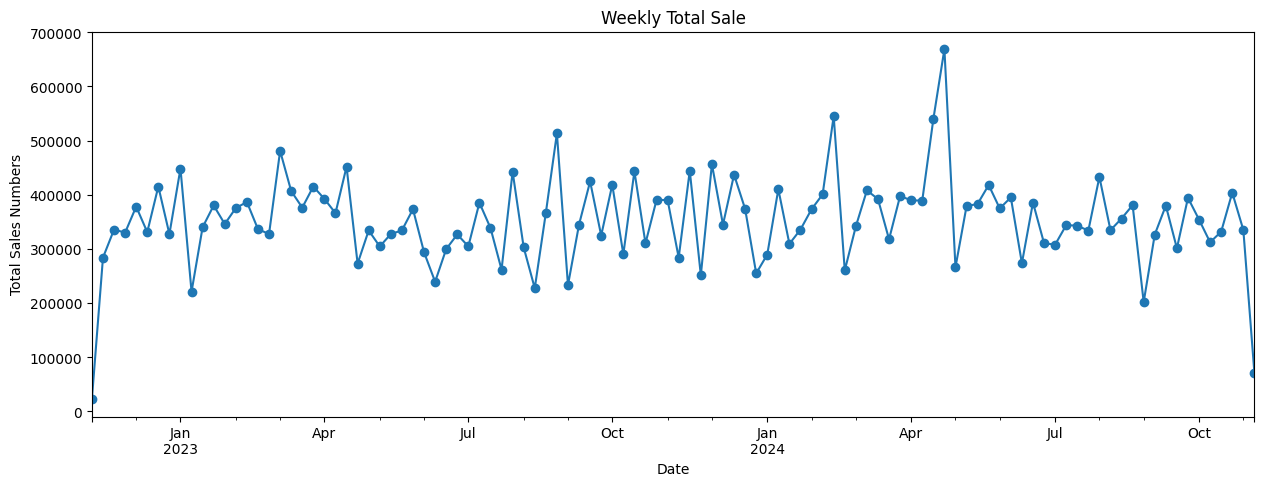

In [22]:
weekly_total_sales.plot(kind="line", title="Weekly Total Sale",  marker="o", figsize=(15,5))   #(kind="line",title="Weekly Total Sales", figsize=(15, 5), marker="o")
plt.ylabel("Total Sales Numbers")
plt.xlabel("Date")
plt.show()

In [23]:
#Monthly product sales for date
monthly_product_sales_quantity = sales_data.resample("ME", on="tarih")["adet"].sum()  #Because of future warnings, used ME instead of M
print(f"Monthly Product Sales Quantity \n {monthly_product_sales_quantity}")

Monthly Product Sales Quantity 
 tarih
2022-11-30    1618
2022-12-31    2189
2023-01-31    2217
2023-02-28    2003
2023-03-31    2210
2023-04-30    2050
2023-05-31    2009
2023-06-30    1507
2023-07-31    2260
2023-08-31    1932
2023-09-30    2169
2023-10-31    2001
2023-11-30    2078
2023-12-31    2202
2024-01-31    2147
2024-02-29    2061
2024-03-31    2211
2024-04-30    2539
2024-05-31    2295
2024-06-30    1980
2024-07-31    2083
2024-08-31    2068
2024-09-30    1939
2024-10-31    2340
2024-11-30     251
Freq: ME, Name: adet, dtype: int64


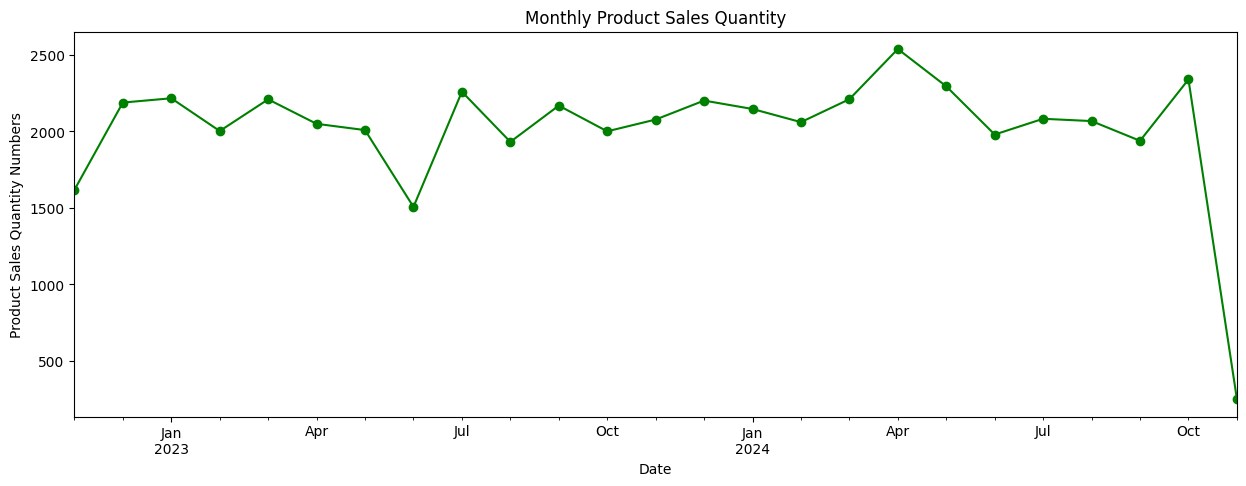

In [24]:
monthly_product_sales_quantity.plot(title="Monthly Product Sales Quantity", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Product Sales Quantity Numbers")
plt.show()

In [25]:
#Monthly total sales for date
pd.options.display.float_format = '{:,.2f}'.format

monthly_total_sales = sales_data.resample("ME", on="tarih")["toplam_satis"].sum()  #Because of future warnings, used ME instead of M
print(f"Monthly Total Sales \n {monthly_total_sales}")

Monthly Total Sales 
 tarih
2022-11-30   1,121,684.07
2022-12-31   1,711,697.61
2023-01-31   1,422,855.49
2023-02-28   1,471,830.82
2023-03-31   1,831,540.54
2023-04-30   1,520,225.72
2023-05-31   1,482,531.98
2023-06-30   1,142,835.10
2023-07-31   1,646,041.80
2023-08-31   1,445,265.18
2023-09-30   1,614,787.51
2023-10-31   1,598,536.73
2023-11-30   1,543,398.48
2023-12-31   1,582,543.46
2024-01-31   1,535,476.09
2024-02-29   1,522,851.27
2024-03-31   1,721,787.07
2024-04-30   2,032,761.21
2024-05-31   1,716,399.30
2024-06-30   1,422,489.87
2024-07-31   1,512,406.09
2024-08-31   1,511,866.60
2024-09-30   1,443,222.11
2024-10-31   1,564,026.61
2024-11-30     211,246.16
Freq: ME, Name: toplam_satis, dtype: float64


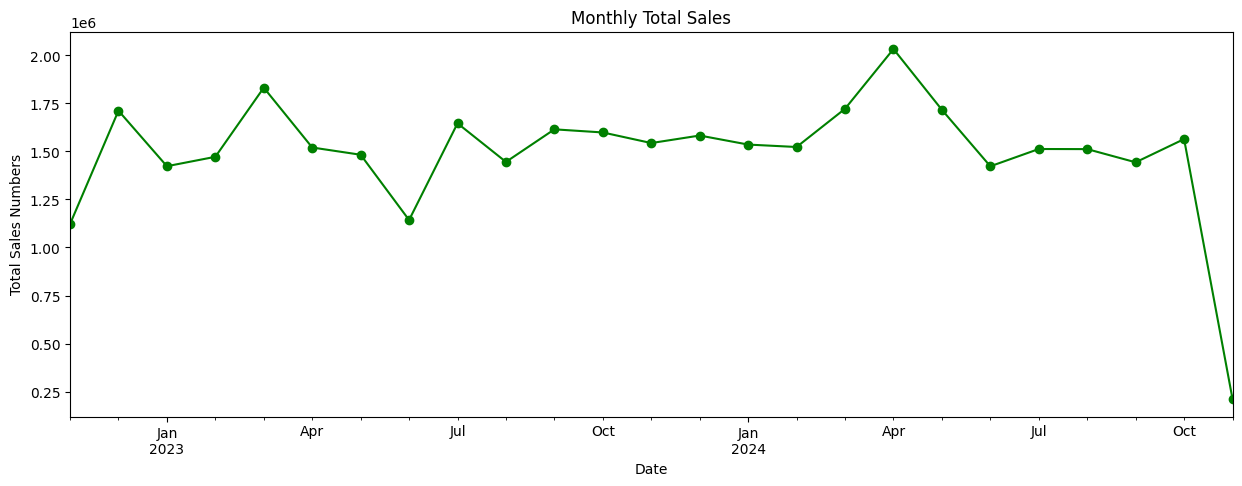

In [26]:
monthly_total_sales.plot(title="Monthly Total Sales", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Total Sales Numbers")
plt.show()

In [27]:
#The amount of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_diff = monthly_product_sales_quantity.diff()  
print(f"Monthly Product Sales Quantity Changes \n {monthly_product_sales_quantity_diff}")


#Since there is no previous data in the first month, the change rate appears as 0

Monthly Product Sales Quantity Changes 
 tarih
2022-11-30         NaN
2022-12-31      571.00
2023-01-31       28.00
2023-02-28     -214.00
2023-03-31      207.00
2023-04-30     -160.00
2023-05-31      -41.00
2023-06-30     -502.00
2023-07-31      753.00
2023-08-31     -328.00
2023-09-30      237.00
2023-10-31     -168.00
2023-11-30       77.00
2023-12-31      124.00
2024-01-31      -55.00
2024-02-29      -86.00
2024-03-31      150.00
2024-04-30      328.00
2024-05-31     -244.00
2024-06-30     -315.00
2024-07-31      103.00
2024-08-31      -15.00
2024-09-30     -129.00
2024-10-31      401.00
2024-11-30   -2,089.00
Freq: ME, Name: adet, dtype: float64


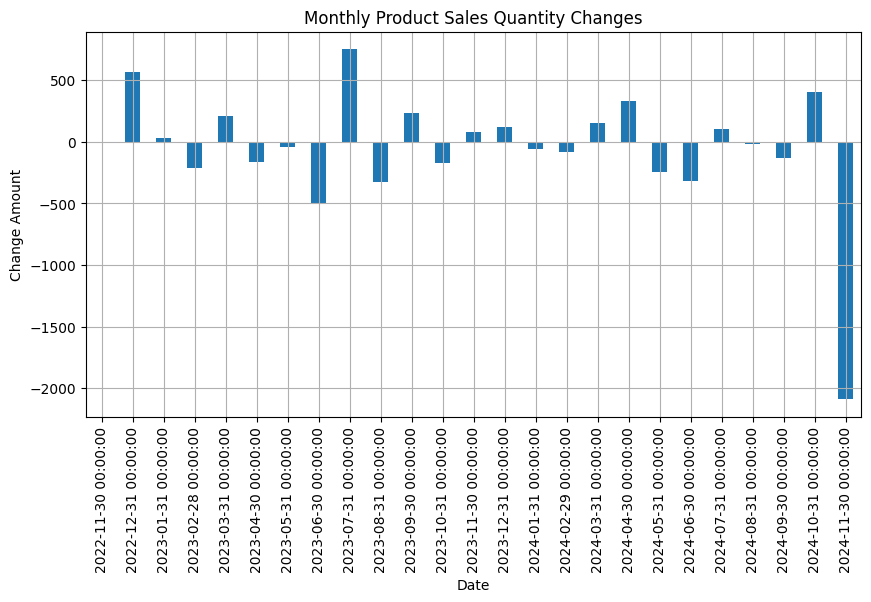

In [28]:
monthly_product_sales_quantity_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Product Sales Quantity Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [29]:
#The percentage change of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_percentage = monthly_product_sales_quantity.pct_change() * 100
print(f"Monthly Sales Unit Change Percentage \n {monthly_product_sales_quantity_percentage}")

#Since there is no previous data in the first month, the change rate appears as 0

Monthly Sales Unit Change Percentage 
 tarih
2022-11-30      NaN
2022-12-31    35.29
2023-01-31     1.28
2023-02-28    -9.65
2023-03-31    10.33
2023-04-30    -7.24
2023-05-31    -2.00
2023-06-30   -24.99
2023-07-31    49.97
2023-08-31   -14.51
2023-09-30    12.27
2023-10-31    -7.75
2023-11-30     3.85
2023-12-31     5.97
2024-01-31    -2.50
2024-02-29    -4.01
2024-03-31     7.28
2024-04-30    14.83
2024-05-31    -9.61
2024-06-30   -13.73
2024-07-31     5.20
2024-08-31    -0.72
2024-09-30    -6.24
2024-10-31    20.68
2024-11-30   -89.27
Freq: ME, Name: adet, dtype: float64


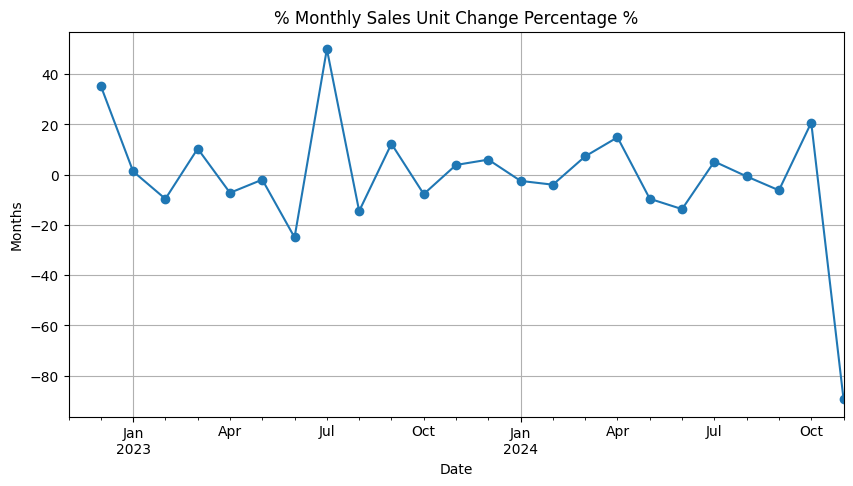

In [30]:
monthly_product_sales_quantity_percentage.plot(kind="line", title="% Monthly Sales Unit Change Percentage %", marker="o", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Months")
plt.grid()
plt.show()

In [31]:
#The amount of increase or decrease compared to the previous month for total sales
monthly_total_sales_diff = monthly_total_sales.diff()  
print(f"Monthly Total Sale Changes \n {monthly_total_sales_diff}")

#Since there is no previous data in the first month, the change rate appears as 0

Monthly Total Sale Changes 
 tarih
2022-11-30             NaN
2022-12-31      590,013.54
2023-01-31     -288,842.12
2023-02-28       48,975.33
2023-03-31      359,709.72
2023-04-30     -311,314.82
2023-05-31      -37,693.74
2023-06-30     -339,696.88
2023-07-31      503,206.70
2023-08-31     -200,776.62
2023-09-30      169,522.33
2023-10-31      -16,250.78
2023-11-30      -55,138.25
2023-12-31       39,144.98
2024-01-31      -47,067.37
2024-02-29      -12,624.81
2024-03-31      198,935.80
2024-04-30      310,974.14
2024-05-31     -316,361.91
2024-06-30     -293,909.43
2024-07-31       89,916.22
2024-08-31         -539.48
2024-09-30      -68,644.49
2024-10-31      120,804.50
2024-11-30   -1,352,780.46
Freq: ME, Name: toplam_satis, dtype: float64


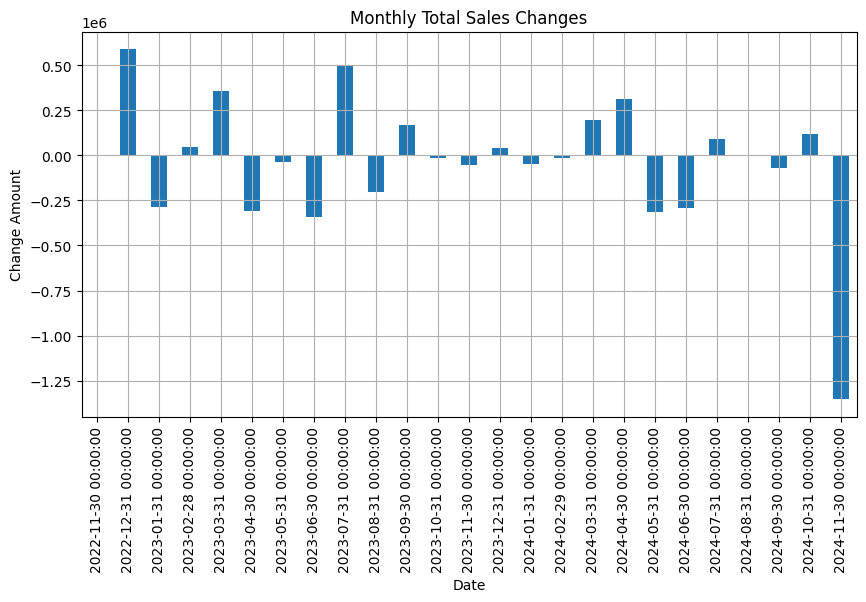

In [32]:
monthly_total_sales_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Total Sales Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [33]:
#The percentage change of increase or decrease compared to the previous month for total sales
monthly_total_sales_percentage = monthly_total_sales.pct_change() * 100
print(f"Monthly Total Sales Changes Percentage \n {monthly_total_sales_percentage}")

Monthly Total Sales Changes Percentage 
 tarih
2022-11-30      NaN
2022-12-31    52.60
2023-01-31   -16.87
2023-02-28     3.44
2023-03-31    24.44
2023-04-30   -17.00
2023-05-31    -2.48
2023-06-30   -22.91
2023-07-31    44.03
2023-08-31   -12.20
2023-09-30    11.73
2023-10-31    -1.01
2023-11-30    -3.45
2023-12-31     2.54
2024-01-31    -2.97
2024-02-29    -0.82
2024-03-31    13.06
2024-04-30    18.06
2024-05-31   -15.56
2024-06-30   -17.12
2024-07-31     6.32
2024-08-31    -0.04
2024-09-30    -4.54
2024-10-31     8.37
2024-11-30   -86.49
Freq: ME, Name: toplam_satis, dtype: float64


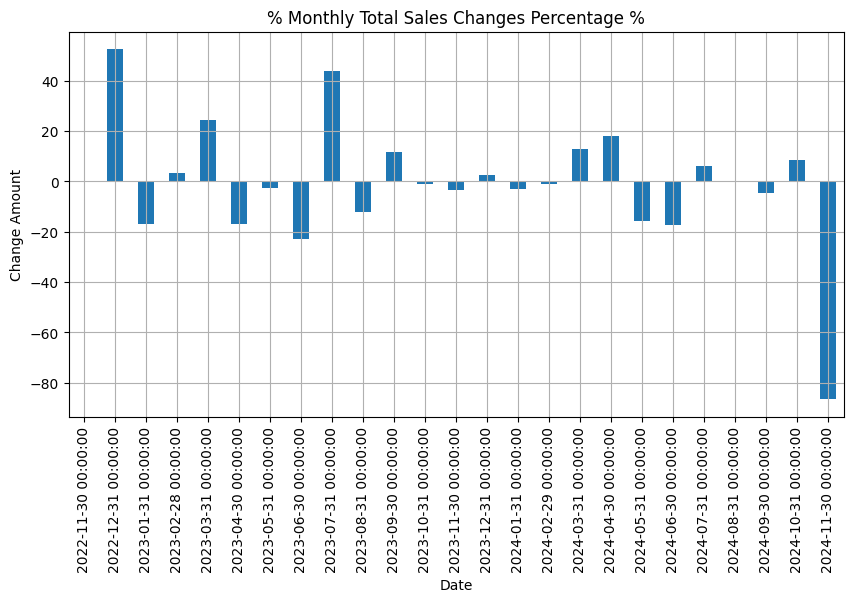

In [34]:
monthly_total_sales_percentage.plot(kind="bar", figsize=(10, 5), title="% Monthly Total Sales Changes Percentage %")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

TASK 3 - Categorical and Numerical Analysis

In [35]:
#Total sales with product category
product_category = sales_data.groupby("kategori")["toplam_satis"].sum()
product_category

kategori
Elektronik        6,143,433.74
Ev Aletleri       6,565,545.78
Giyim             6,272,433.46
Kozmetik          6,208,006.37
Kırtasiye         6,183,384.76
Mutfak Ürünleri   5,957,502.75
Name: toplam_satis, dtype: float64

In [36]:
product_category_percentage = (product_category / product_category.sum()) * 100
product_category_percentage

kategori
Elektronik        16.46
Ev Aletleri       17.59
Giyim             16.80
Kozmetik          16.63
Kırtasiye         16.56
Mutfak Ürünleri   15.96
Name: toplam_satis, dtype: float64

In [37]:
#Total sales by product category
product_category = sales_data.groupby("kategori")["toplam_satis"].sum()

#The percentace of each category in total sales
product_category_percentage = (product_category / product_category.sum()) * 100

#Display results in a single table
category_table = pd.DataFrame(
    {
    "Total sales by product category": product_category,
    "Percentage of each category": product_category_percentage
    }
)

print(category_table)

                 Total sales by product category  Percentage of each category
kategori                                                                     
Elektronik                          6,143,433.74                        16.46
Ev Aletleri                         6,565,545.78                        17.59
Giyim                               6,272,433.46                        16.80
Kozmetik                            6,208,006.37                        16.63
Kırtasiye                           6,183,384.76                        16.56
Mutfak Ürünleri                     5,957,502.75                        15.96


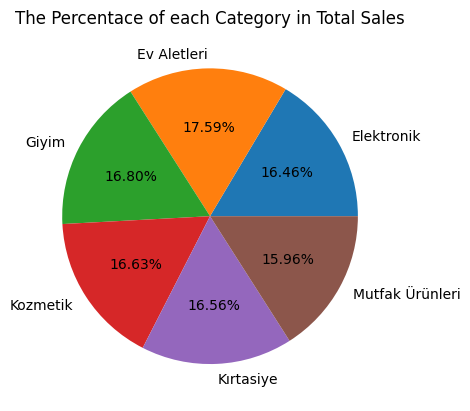

In [38]:
plt.pie(
    category_table["Percentage of each category"], 
    labels=category_table.index, 
    autopct="%1.2f%%"
)

plt.title("The Percentace of each Category in Total Sales")
plt.show()

In [39]:
#Sales trends of customers will be analyzed according to their age groups. 
#Therefore, merged_data was used instead of sales_data.


#First, the minimum and maximum age range limit in the dataset was checked.
min_age = merged_data["yas"].min()
print(f"Minimum age: {min_age}")

max_age = merged_data["yas"].max()
print(f"Maximum age: {max_age}")

Minimum age: 18
Maximum age: 69


In [40]:
bins = [18, 26, 36, 51, 150]    #age groups
labels = ["18-25", "26-35", "36-50", "50+"]

#Split customers by age groups
merged_data["yas"] = pd.cut(merged_data["yas"], bins=bins, labels=labels)

In [ ]:
#Total sales amount according to age groups
age_group_sales = merged_data.groupby("yas")["toplam_satis"].sum().unstack()

#Product sales amount according to age groups
age_group_product_sales = merged_data.groupby("yas")["adet"].sum()

#Display results in a single table
age_sales_table = pd.DataFrame(
    {
    "Total Sales According to Age Group": age_group_sales,
    "Product Sales According to Age Group": age_group_product_sales,
    }
)

age_sales_table

#According to these result, it was observed that the highest sales were over 50 years old.

C:\Users\Acer\AppData\Local\Temp\ipykernel_11040\2903249903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = merged_data.groupby("yas")["toplam_satis"].sum()
C:\Users\Acer\AppData\Local\Temp\ipykernel_11040\2903249903.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_product_sales = merged_data.groupby("yas")["adet"].sum()


,Total Sales According to Age Group,Product Sales According to Age Group
yas,,
18-25,"5,797,811.97",7666
26-35,"6,912,078.64",9514
36-50,"11,219,861.78",15133
50+,"12,636,212.62",17076


In [66]:
# Pivot tablo oluşturma
pivot_table = merged_data.pivot_table(
    values="toplam_satis", 
    index="yas", 
    columns="kategori", 
    aggfunc="sum", 
    fill_value=0
)

print(pivot_table)


kategori   Elektronik  Ev Aletleri        Giyim     Kozmetik    Kırtasiye  \
yas                                                                         
18-25      952,029.52 1,208,410.51   942,121.27   826,931.49   900,683.86   
26-35    1,199,434.12 1,096,760.81 1,115,049.98 1,175,919.97 1,297,219.15   
36-50    1,774,241.20 1,916,456.32 2,219,525.38 1,738,356.84 1,786,995.79   
50+      2,059,757.96 2,228,675.37 1,927,999.58 2,277,288.90 2,089,690.52   

kategori  Mutfak Ürünleri  
yas                        
18-25          967,635.33  
26-35        1,027,694.61  
36-50        1,784,286.23  
50+          2,052,800.30  


C:\Users\Acer\AppData\Local\Temp\ipykernel_11040\163902431.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = merged_data.pivot_table(


In [ ]:
#Total sales amount according to age / category groups
grouped_sales = merged_data.groupby(["yas", "kategori"])["toplam_satis"].sum().reset_index()

#Top category in every age group
top_category_by_age = grouped_sales.loc[grouped_sales.groupby("yas")["toplam_satis"].idxmax()]

print(f"Top Category by Age \n {top_category_by_age}")


C:\Users\Acer\AppData\Local\Temp\ipykernel_11040\2648037096.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_sales = merged_data.groupby(["yas", "kategori"])["toplam_satis"].sum().reset_index()


Top Category by Age 
       yas     kategori  toplam_satis
1   18-25  Ev Aletleri  1,208,410.51
10  26-35    Kırtasiye  1,297,219.15
14  36-50        Giyim  2,219,525.38
21    50+     Kozmetik  2,277,288.90


C:\Users\Acer\AppData\Local\Temp\ipykernel_11040\2648037096.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_category_by_age = grouped_sales.loc[grouped_sales.groupby("yas")["toplam_satis"].idxmax()]


In [78]:
#Total sales by gender
gender_sales = merged_data.groupby("cinsiyet")["toplam_satis"].sum()
print(f"Total Sales by Gender\n{gender_sales}")

Total Sales by Gender
cinsiyet
Erkek   18,488,655.59
Kadın   18,841,651.29
Name: toplam_satis, dtype: float64


In [80]:
#Average spending amount by gender
gender_spending = merged_data.groupby("cinsiyet")["harcama_miktari"].mean()
print(f"Average Spending Amount by Gender\n{gender_spending}")

Average Spending Amount by Gender
cinsiyet
Erkek   2,571.32
Kadın   2,610.13
Name: harcama_miktari, dtype: float64


In [ ]:
#Total sales by gender and category

#Since there were multi index, the results were unstacked to make them easier to read in a table view.
gender_category_sales = merged_data.groupby(["cinsiyet", "kategori"])["toplam_satis"].sum().unstack() 
gender_category_sales

kategori,Elektronik,Ev Aletleri,Giyim,Kozmetik,Kırtasiye,Mutfak Ürünleri
cinsiyet,,,,,,
Erkek,"3,000,633.89","3,392,733.17","3,371,244.79","2,934,132.60","2,925,334.10","2,864,577.04"
Kadın,"3,142,799.85","3,172,812.61","2,901,188.67","3,273,873.77","3,258,050.67","3,092,925.71"


In [93]:
#Total sales by gender and age
gender_age_sales = merged_data.groupby(["yas","cinsiyet"])["toplam_satis"].sum().unstack()
gender_age_sales

#According to these results, it seems that women shop more in all age groups.

C:\Users\Acer\AppData\Local\Temp\ipykernel_11040\1828888756.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_sales = merged_data.groupby(["yas","cinsiyet"])["toplam_satis"].sum().unstack()


cinsiyet,Erkek,Kadın
yas,,
18-25,"2,760,482.63","3,037,329.35"
26-35,"3,473,730.63","3,438,348.01"
36-50,"5,566,646.91","5,653,214.87"
50+,"6,301,281.79","6,334,930.83"


In [ ]:
#Total product sales quantity by age
gender_product_quantity = merged_data.groupby("cinsiyet")["adet"].sum()
gender_product_quantity

cinsiyet
Erkek    24900
Kadın    25459
Name: adet, dtype: int64

In [ ]:
#Total product sales by age ang category
gender_product_sales = merged_data.groupby(["cinsiyet", "ürün_adi"])["adet"].sum().unstack()
gender_product_sales

#According to these analyses, the product category that women buy the most is phones. 
#The product that men buy the most is bags.

ürün_adi,Bilgisayar,Defter,Fırın,Kalem,Klima,Kulaklık,Mouse,Su Şişesi,Telefon,Çanta
cinsiyet,,,,,,,,,,
Erkek,2322,2640,2220,2715,2075,2517,2395,2654,2468,2894
Kadın,2263,2562,2613,2585,2609,2421,2666,2605,2776,2359
